In [1]:
from __future__ import print_function
import numpy as np
import cv2

In [49]:
### CAPTURE VIDEO
cam = cv2.VideoCapture(0)
ret, img = cam.read()
cv2.destroyAllWindows() 
cam.release()

In [7]:
from matplotlib.pyplot import imshow

In [9]:
%matplotlib inline

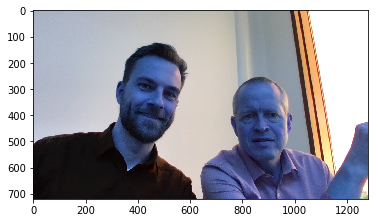

In [50]:
imshow(img)

In [16]:
import requests

In [17]:
import PIL

In [18]:
import StringIO

In [51]:
f = StringIO.StringIO()
PIL.Image.fromarray(img).save(f, 'png')
data = f.getvalue()

In [34]:
from donthackme import API_KEY

In [38]:
endpoint = 'https://westeurope.api.cognitive.microsoft.com/face/v1.0/detect'
args = {'returnFaceId': 'true',
        'returnFaceLandmarks': 'false',
        'returnFaceAttributes': 'age,gender,emotion'}
headers = {'Content-Type': 'application/octet-stream',
           'Ocp-Apim-Subscription-Key': API_KEY}

In [52]:
response = requests.post(data=data,url=endpoint,headers=headers,params=args)

In [53]:
response

<Response [200]>

In [54]:
response.json()

[{u'faceAttributes': {u'age': 39.4,
   u'emotion': {u'anger': 0.0,
    u'contempt': 0.0,
    u'disgust': 0.0,
    u'fear': 0.0,
    u'happiness': 0.999,
    u'neutral': 0.001,
    u'sadness': 0.0,
    u'surprise': 0.0},
   u'gender': u'male'},
  u'faceId': u'59e975fb-d3d5-441f-8925-81f5aafc3cfc',
  u'faceRectangle': {u'height': 222,
   u'left': 356,
   u'top': 241,
   u'width': 222}},
 {u'faceAttributes': {u'age': 55.6,
   u'emotion': {u'anger': 0.06,
    u'contempt': 0.054,
    u'disgust': 0.048,
    u'fear': 0.0,
    u'happiness': 0.02,
    u'neutral': 0.788,
    u'sadness': 0.026,
    u'surprise': 0.004},
   u'gender': u'male'},
  u'faceId': u'4ca87693-e0ee-40fe-84f0-3229dfecb1f7',
  u'faceRectangle': {u'height': 212,
   u'left': 769,
   u'top': 341,
   u'width': 212}}]